# Engineering Data Analysis

> **Mohamad M. Hallal, PhD** <br> Teaching Professor, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

# Common Discrete Distributions

In this notebook, we will explore common discrete distributions and learn how to use them with the `scipy.stats` library. Discrete distributions are used to model scenarios where outcomes are distinct and countable. The `scipy.stats` library has built-in methods that can be used to directly obtain the probability mass function (PMF), cumulative distribution function (CDF), mean, variance, and more of any common distribution. However, it is **very important** to understand the inputs to these distributions in Python, as they might differ from what we discussed in class.

Let's get started!

# Bernoulli Distribution

The Bernoulli distribution is the simplest discrete distribution, representing a single trial with two possible outcomes: success (1) or failure (0). It is characterized by a single parameter, $p$, which is the probability of success.

| Distribution      | Python function |
|:------------------|:----------------|
| Bernoulli         | [`bernoulli(p)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli) |

Each distribution has built-in methods to directly calculate summary statistics, PMF, CDF, and even obtain a random sample. Below is a table summarizing some common methods available for discrete distributions in `scipy.stats`:

| Method     | Description                                    | General Example    | Bernoulli Example                  |
|:-----------|:-----------------------------------------------|:-------------------|:-----------------------------------|
| `pmf()`    | Computes the PMF at specific value(s)          | `dist.pmf(k)`      | `bernoulli.pmf(p=0.5, k=0)`        |
| `cdf()`    | Computes the CDF at specific value(s)          | `dist.cdf(k)`      | `bernoulli.cdf(p=0.5, k=range(2))` |
| `mean()`   | Computes the expected value                    | `dist.mean()`      | `bernoulli.mean(p=0.5)`            |
| `median()` | Computes the median                            | `dist.median()`    | `bernoulli.median(p=0.5)`          |
| `var()`    | Computes the variance                          | `dist.var()`       | `bernoulli.var(p=0.5)`             |
| `std()`    | Computes the standard deviation                | `dist.std()`       | `bernoulli.std(p=0.5)`             |
| `rvs()`    | Generates random samples from the distribution | `dist.rvs(size=n)` | `bernoulli.rvs(p=0.5, size=10)`    |

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute the mean and standard deviation of a Bernoulli distribution with $p= 0.8$.</div> 

In [1]:
from scipy.stats import bernoulli

# compute mean
mean = bernoulli.mean(p=0.8)
print(f'Mean: {mean:.2f}')

Mean: 0.80


In [3]:
# compute standard deviation
std = bernoulli.std(p=0.8)
print(f'Standard deviation: {std:.2f}')

Standard deviation: 0.40


# Binomial Distribution

The Binomial distribution generalizes the Bernoulli distribution to multiple trials. It represents the number of successes in $n$ independent Bernoulli trials, each with probability $p$ of success.


| Distribution      | Python function |
|:------------------|:----------------|
| Binomial          | [`binom(n, p)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) |

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute and plot the PMF of a Binomial distribution with 10 trials $p= 0.8$.</div> 

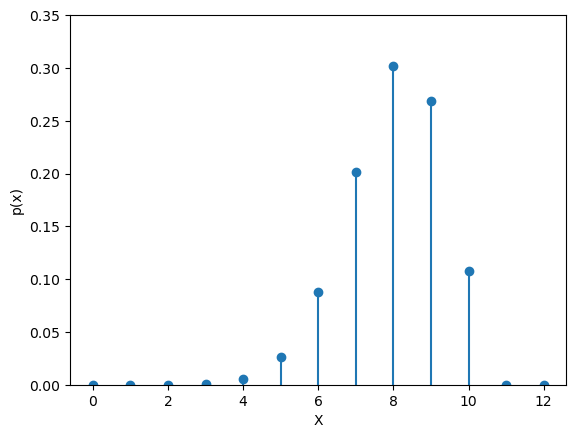

In [7]:
from scipy.stats import binom
import matplotlib.pyplot as plt

# Parameters
n = 10  # Number of trials
p = 0.8  # Probability of success

# x values
x = range(13)

# plot PMF using plt.vlines(x, ymin, ymax)
pmf = binom.pmf(n=10, p=0.8, k=x)
plt.vlines(x, 0, pmf)

# plot markers of the pmf using plt.scatter(x, y)
plt.scatter(x, pmf)

# label the axes
plt.ylabel('p(x)')
plt.xlabel('X')

# control the y axis
plt.ylim(0, 0.35)

plt.show()

# Poisson Distribution

The Poisson distribution models the number of events occurring within a fixed interval of time or space, given a known constant occurrence rate $\lambda$. It is often used for rare events.

| Distribution      | Python function |
|:------------------|:----------------|
| Poisson           | [`poisson(mu)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson) |

In the lecture, we mentioned that the Poisson distribution can be parametrized by either the rate of occurrence or the average number of occurrence. However, as shown above, the Poisson distribution accepts a single input parameter, `mu`, so it is important to understand what does this parameter represent.

In the documentation of `scipy.stats.poisson`, the probability mass function (PMF) of the Poisson distribution is given as:

$$f(k) = \text{exp}(-\mu)\dfrac{\mu^k}{k!}, \ \ \ k = \{0, 1, 2, ...\}$$

This is equivalent to what we defined in the lecture. If $\lambda$ is the average **number** of occurrences in the time interval we are interested in, $t$, we defined the PMF as:

$$f(x) = \dfrac{e^{-\lambda} \lambda^x}{x!}, \ \ \ x = \{0, 1, 2, ...\}$$

If $\lambda$ is the average **rate** of occurrences in the time interval we are interested in, $t$, we defined the PMF as:

$$f(x) = \dfrac{e^{-\lambda t} (\lambda t)^x}{x!}, \ \ \ x = \{0, 1, 2, ...\}$$

By comparing the given equation for the probability mass function in the documentation of `scipy.stats.poisson` with the lecture notes, it should be evident that $\mu$ represents the average **number** of occurrences in the time interval we are interested in, $t$.

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute and plot the CDF of the number of earthquakes over 100 years, which occur at an average rate of 1 every 10 years.</div> 

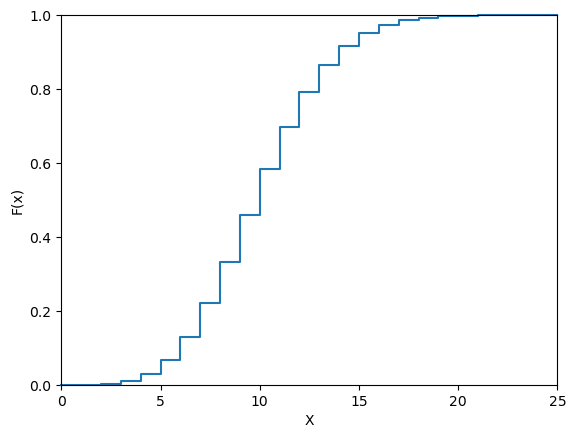

In [11]:
from scipy.stats import poisson

# Parameters
rate = 1/10    # Rate of occurrence
t = 100      # time of interest
mu = rate * t      # Average number of occurrences

# x values
x = range(26)

# plot CDF using plt.step(x, y, clip_on=False, where='post')
plt.step(x, poisson.cdf(mu=rate * t, k=x), clip_on=False, where='post')

# label the axes
plt.ylabel('F(x)')
plt.xlabel('X')

# control the axes
plt.ylim(0, 1)
plt.xlim(0, 25)

plt.show()

These are only some of the common discrete distributions. You will explore other common discrete distributions in the lab.